In [1]:
%matplotlib inline
import random
random.seed(1234)
from string import punctuation
import pandas as pd
import gzip
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
# import nltk
# nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
import spacy
import matplotlib.pyplot as plt
import pyLDAvis #python library for interactive topic model visualization
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
spacy.prefer_gpu()
nlp = spacy.load("en_core_web_sm")

# import gensim.downloader
# w2v = gensim.downloader.load('word2vec-google-news-300')

# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

# import warnings
# warnings.filterwarnings("ignore",category=DeprecationWarning)

import pickle
import numpy as np

# Sklearn
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from pprint import pprint

# Plotting tools
# import pyLDAvis
# import pyLDAvis.sklearn
# import matplotlib.pyplot as plt
%matplotlib inline

from tqdm.notebook import tqdm as tqdm
tqdm.pandas()
import math
import nltk
from collections import defaultdict

nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])
from nltk.probability import FreqDist
from gensim.models.ldamulticore import LdaMulticore
from nltk import tokenize

stop_words = stopwords.words('english')

from nltk.stem import WordNetLemmatizer
  
lemmatizer = WordNetLemmatizer()

from numpy import dot
from numpy.linalg import norm
import random

import itertools

#nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer
sent = SentimentIntensityAnalyzer()

from scipy.spatial.distance import pdist
from scipy.spatial import distance
from scipy.cluster.hierarchy import dendrogram, linkage

from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

from nltk.tokenize import sent_tokenize

from sklearn.preprocessing import MinMaxScaler
from nltk import pos_tag

import re

# Read Data

In [2]:
# df = pd.read_csv('./all_df.csv', index_col = False)

In [3]:
# df0 = df.loc[(df.category_2 == 'Cats')]
# df1 = df.loc[(df.category_2 == 'Cats') & (df.category_3 == 'Food') ]
# df2 = df.loc[(df.category_2 == 'Cats') & (df.category_3 == 'Beds & Furniture')] 
# df3 = df.loc[(df.category_2 == 'Cats') & (df.category_3 == 'Litter & Housebreaking')]
# df4 = df.loc[(df.category_2 == 'Cats') & (df.category_3 == 'Toys')]
# df5 = df.loc[(df.category_2 == 'Cats') & (df.category_3 == 'Treats')]
# df6 = df.loc[(df.category_2 == 'Cats') & (df.category_3 == 'Grooming') ]
# df7 = df.loc[(df.category_2 == 'Cats') & (df.category_3 == 'Feeding & Watering Supplies') ]
# df8 = df.loc[(df.category_2 == 'Cats') & (df.category_3 == 'Cat Flaps, Steps, Nets & Pens') ]
# df9 = df.loc[(df.category_2 == 'Cats') & (df.category_3 == 'Collars, Harnesses & Leashes') ]
# df10 = df.loc[(df.category_2 == 'Cats') & (df.category_3 == 'Health Supplies')]
# df11 = df.loc[(df.category_2 == 'Cats') & (df.category_3 == 'Educational Repellents')]
# df12 = df.loc[(df.category_2 == 'Cats') & (df.category_3 == 'Carriers & Strollers')]
# df13 = df.loc[(df.category_2 == 'Cats') & (df.category_3 == 'Cages')]
# df14 = df.loc[(df.category_2 == 'Cats') & (df.category_3 == 'Memorials')]
# df15 = df.loc[(df.category_2 == 'Cats') & (df.category_3 == 'Apparel')]

In [4]:
# with open ('./model/df1.pickle', 'wb') as handle:
#     pickle.dump(df1, handle)

In [3]:
with open ('./model/df1.pickle', 'rb') as handle:
    df1 = pickle.load(handle)

In [4]:
df1.head()

,Unnamed: 0,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,...,salesRank,imUrl,brand,categories,description,category_1,category_2,category_3,category_4,category_5
7723,7723,A11W8BQHCSU0RA,B00008437P,Connie Gelfer,"[0, 0]",I found these on sale and bought them on a whi...,5.0,need more!,1379462400,"09 18, 2013",...,{'Pet Supplies': 84866},http://ecx.images-amazon.com/images/I/51R535q-...,NaN,"[['Pet Supplies', 'Cats', 'Food']]",Crazy Spinners will drive your cat crazy! Perf...,Pet Supplies,Cats,Food,NaN,NaN
7724,7724,A2J5FJRZV4994H,B00008437P,"D. Bors ""Dors""","[1, 1]","My kittens were crazy over these, but as they ...",4.0,Favorite for some cats,1354579200,"12 4, 2012",...,{'Pet Supplies': 84866},http://ecx.images-amazon.com/images/I/51R535q-...,NaN,"[['Pet Supplies', 'Cats', 'Food']]",Crazy Spinners will drive your cat crazy! Perf...,Pet Supplies,Cats,Food,NaN,NaN
7725,7725,A7NB0VU0UQ88D,B00008437P,Gail Aslin,"[1, 1]",My cat absolutely loves spinners! She carries...,5.0,Best Cat Toy Ever!,1366675200,"04 23, 2013",...,{'Pet Supplies': 84866},http://ecx.images-amazon.com/images/I/51R535q-...,NaN,"[['Pet Supplies', 'Cats', 'Food']]",Crazy Spinners will drive your cat crazy! Perf...,Pet Supplies,Cats,Food,NaN,NaN
7726,7726,A1CV90TGSKF3DT,B00008437P,Jennifer,"[1, 2]",these were TINY and made out of very lightweig...,1.0,"TINY, CHEAPLY MADE, CAT CHOKED",1335744000,"04 30, 2012",...,{'Pet Supplies': 84866},http://ecx.images-amazon.com/images/I/51R535q-...,NaN,"[['Pet Supplies', 'Cats', 'Food']]",Crazy Spinners will drive your cat crazy! Perf...,Pet Supplies,Cats,Food,NaN,NaN
7727,7727,AZVMWL9E4T9ZD,B00008437P,"JR Dixey ""I am a technophile and librarian in...","[0, 0]",I bought this cat toy thinking that I would us...,5.0,For Birds Too!,1389398400,"01 11, 2014",...,{'Pet Supplies': 84866},http://ecx.images-amazon.com/images/I/51R535q-...,NaN,"[['Pet Supplies', 'Cats', 'Food']]",Crazy Spinners will drive your cat crazy! Perf...,Pet Supplies,Cats,Food,NaN,NaN


In [5]:
sents = [tokenize.sent_tokenize(str(r)) for r in df1.reviewText.tolist()]
columns_name = ['Sentence' + str(i) for i in range(1, 31, 1)]
sents_df1 = pd.DataFrame([sen[:30] for sen in sents], columns = columns_name)

In [6]:
with open ('./model/sents_df1.pickle', 'wb') as handle:
    pickle.dump(sents_df1, handle)

In [7]:
with open ('./model/sents_df1.pickle', 'rb') as handle:
    sents_df1 = pickle.load(handle)

# Get attributes

In [8]:
def clean(sentence, stop_words):
    '''
    Clean sentence. 
            Parameters:
                    sentence (string): A string. 
                    stop_words (list): A list of words to be removed from a sentence. 
                    Lemmatize (boolean): A boolean to indicate whether or not to run lemmatization. . 
                    
            Returns:
                    _ (list): A list of cleaned tokens. 
    '''
    sen0 = ' '.join([word.lower() for word in str(sentence).split() if word.lower() not in stop_words])
    sen1 = sen0.translate(str.maketrans('', '', punctuation))
    tokens1 = [re.sub('[\d.,]' , '', word.lower()) for word in str(sen1).split() if word.lower() not in stop_words]
    sen2 = ' '.join(tokens1)
    tokens1 = [word.lemma_ for word in nlp(sen2)] 
    return tokens1

# def sent_to_words(sentences):
#     '''
#     Simplify and tokenize strings in an iterable.
    
#             Parameters:
#                     sentences (iterable): Review strings in a list or as a pandas.series.
                    
#             Returns:
#                     _ (generator): Simplify review tokens.  
#     '''
#     for sentence in sentences:
#         yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

def get_bigrams(data_words): 
    '''
    Form bigram.
    
        Parameters:
            data_words (iterable): token lists in an iterable. 

        Returns:
           _, _, bigram_pmi (data frame): Bigrams and their pmi scores in a Data Frame. 
    '''
    bigram_measures = nltk.collocations.BigramAssocMeasures()
    finder = nltk.collocations.BigramCollocationFinder.from_documents(data_words) 
    finder.apply_freq_filter(20)
    bigram_scores = finder.score_ngrams(bigram_measures.pmi) 
    bigram_pmi = pd.DataFrame(bigram_scores)
    bigram_pmi.columns = ['bigram', 'pmi']
    bigram_pmi.sort_values(by='pmi', axis = 0, ascending = False, inplace = True)
    return finder, bigram_measures, bigram_pmi

def bigram_filter(bigram):
    """
    Filter bigram. 
        
        Parameters:
            bigram (string): A bigram.

        Returns:
           _ (boolean): Decide whether or not to keep the bigram.
    """
    stop_words = stopwords.words('english')   
    tag = nltk.pos_tag(bigram)
    if tag[0][1] not in ['JJ', 'NN'] and tag[1][1] not in ['NN']: #we only want adjective + noun
        return False
    if bigram[0] in stop_words or bigram[1] in stop_words: 
        return False
    if 'n' in bigram or 't' in bigram:
        return False
    if 'PRON' in bigram: 
        return False
    if len(bigram[0]) <= 2 or len(bigram[1]) <= 2:
        return False
    return True

def get_trigrams(data_words): 
    trigram_measures = nltk.collocations.TrigramAssocMeasures()
    finder = nltk.collocations.TrigramCollocationFinder.from_documents(data_words) 
    finder.apply_freq_filter(20)
    trigram_scores = finder.score_ngrams(trigram_measures.pmi)

    trigram_pmi = pd.DataFrame(trigram_scores)
    trigram_pmi.columns = ['trigram', 'pmi']
    trigram_pmi.sort_values(by='pmi', axis = 0, ascending = False, inplace = True)
    return finder, trigram_measures, trigram_pmi

def trigram_filter(trigram):
    tag = nltk.pos_tag(trigram)
    stop_words = stopwords.words('english')
    if tag[0][1] not in ['JJ', 'NN'] and tag[1][1] not in ['JJ','NN']:
        return False
    if trigram[0] in stop_words or trigram[-1] in stop_words or trigram[1] in stop_words:
        return False
    if 'n' in trigram or 't' in trigram:
        return False
    if 'PRON' in trigram:
        return False
    if len(trigram[0]) <= 2 or len(trigram[1]) <= 2 and len(trigram[2]) <= 2:
        return False
    return True 

def replace_ngram(x, bigrams, trigrams):
    '''
    Form ngram. 
        
        Parameters:
            bigram (string): a ngrams.

        Returns:
           x (string): A connected ngrams with underscore.  
    '''
    for gram in trigrams:
        x = x.replace(gram, '_'.join(gram.split()))
    for gram in bigrams:
        x = x.replace(gram, '_'.join(gram.split()))
    return x

def remove_stopwords(texts, extra_stopwords = []):
    '''
    Remove stopwords in an iterable (string or tokens).

        Parameters:
                texts (iterable): Review strings in a list or as a pandas.series.

        Returns:
                _ (list): Simplify review stirngs without stopwords.  
    '''
    stop_words = stopwords.words('english') + extra_stopwords
    return [[word for word in doc.split() if word not in stop_words] for doc in texts]

# def lemmatize_skip_ngrams(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
#     '''feed tokens'''
#     nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])
#     texts_out = []
#     for sent in texts:
#         doc = nlp(' '.join(sent)) 
#         if len(allowed_postags) > 0: 
#             returned_doc = []
#             for token in doc:
#                 if '_' in token.text:
#                     returned_token = token.text
#                 if token.pos_ in allowed_postags and '_' not in token.text:
#                     returned_token = token.lemma_
#                 if token.pos_ not in allowed_postags and '_' not in token.text:
#                     continue
#                 returned_doc.append(returned_token)
#             texts_out.append(returned_doc)
                    
#         else: 
#             returned_doc = []
#             for token in doc:
#                 if '_' in token.text:
#                     returned_token = token.text
#                 else: 
#                     returned_token = token.lemma_
#                 returned_doc.append(returned_token)
#             texts_out.append(returned_doc)
#     return texts_out

<>:14: DeprecationWarning: invalid escape sequence \d
<>:14: DeprecationWarning: invalid escape sequence \d
C:\Users\JIATIN~1\AppData\Local\Temp/ipykernel_25456/3975747045.py:14: DeprecationWarning: invalid escape sequence \d
  tokens1 = [re.sub('[\d.,]' , '', word.lower()) for word in str(sen1).split() if word.lower() not in stop_words]


In [9]:
remove_words = ['dog',
 'cat',
 'food',
 'bed',
 'litter',
 'product',
 'love',
 'like',
 'well',
 'would',
 'work',
 'toy',
 'great',
 'make',
 'good',
 'time',
 'go',
 'I',
 'little',
 'small',
 'look',
 'try',
 'really',
 'seem',
 'recommend',
 'day',
 'month',
 'year',
 'much',
 'nice' , 
 'old', 
 'able', 
 'first', 
 'happy', 
 'thing', 
 'kitten'
]
extra_stopwords = ["don't", "donnt", "he's", "i'd", "would", "she's", "that's", \
                   "i'm", "can't", "i've", "they're", "we'll", "willn't", \
                   "isn't", "aren't", "wouldn't", "would've", "we've", "ve"] + \
                   ["cat", "food"] + remove_words
stop_words = sorted(list(set(stopwords.words('english')  + extra_stopwords)))

In [12]:
def extract_attributes(reviews, stop_words):
    cleaned_tokens = [clean(sen, stop_words = stop_words) for sen in reviews]
    sens = [' '.join(sen) for sen in cleaned_tokens] 
    cleaned_tokens2 = [[token.lemma_ for token in nlp(sen)] for sen in tqdm(sens)] #different ways to lemmatize

    bifinder, bimeasures, bi_pmi = get_bigrams(tqdm(cleaned_tokens)) 
    tri_finder, tri_measures, tri_pmi = get_trigrams(tqdm(cleaned_tokens))
    
    bifinder, bimeasures, bi_pmi2 = get_bigrams(tqdm(cleaned_tokens2)) 
    tri_finder, tri_measures, tri_pmi2 = get_trigrams(tqdm(cleaned_tokens2))
    print('get bigrams.')
    cleaned_bi_pmi = bi_pmi[bi_pmi.progress_apply(lambda bigram: bigram_filter(bigram['bigram']) and bigram.pmi > 5, axis = 1)] 
    cleaned_bi_pmi2 = bi_pmi2[bi_pmi2.progress_apply(lambda bigram: bigram_filter(bigram['bigram']) and bigram.pmi > 5, axis = 1)] 

    print('get trigrams.')
    cleaned_tri_pmi = tri_pmi[tri_pmi.progress_apply(lambda trigram: trigram_filter(trigram['trigram']) and trigram.pmi > 5, axis = 1)]
    cleaned_tri_pmi2 = tri_pmi2[tri_pmi2.progress_apply(lambda trigram: trigram_filter(trigram['trigram']) and trigram.pmi > 5, axis = 1)]

    print('get lemmatized tokens from spacy.')
    tags = [pos_tag(sen) for sen in tqdm(cleaned_tokens2)]
    print('get adjectives.')
    adj_tokens = [t[0] for sen in tags for t in sen if t[1] == 'JJ']
    print('get nouns.')
    noun_tokens = [t[0] for sen in tags for t in sen if t[1] == 'NN']
    print('get verbs.')
    verb_tokens = [t[0] for sen in tags for t in sen if t[1] == 'VB']

    return {
        'cleaned_tokens': cleaned_tokens,
        'cleaned_tokens2': cleaned_tokens2,
        'cleaned_bi_pmi': cleaned_bi_pmi, 
        'cleaned_tri_pmi': cleaned_tri_pmi,
        'cleaned_bi_pmi2': cleaned_bi_pmi2, 
        'cleaned_tri_pmi2': cleaned_tri_pmi2,
        'tags': tags,
        'adj_tokens': FreqDist(adj_tokens).most_common(50),
        'noun_tokens': FreqDist(noun_tokens).most_common(50),
        'verb_tokens': FreqDist(verb_tokens).most_common(50)
    }

In [175]:
# df1_dict = extract_attributes(tqdm(df1.reviewText.tolist()), stop_words = stop_words)

  0%|          | 0/27843 [00:00<?, ?it/s]

  0%|          | 0/27843 [00:00<?, ?it/s]

  0%|          | 0/27843 [00:00<?, ?it/s]

  0%|          | 0/27843 [00:00<?, ?it/s]

  0%|          | 0/27843 [00:00<?, ?it/s]

  0%|          | 0/27843 [00:00<?, ?it/s]

get bigrams.


  0%|          | 0/4467 [00:00<?, ?it/s]

  0%|          | 0/4494 [00:00<?, ?it/s]

get trigrams.


  0%|          | 0/533 [00:00<?, ?it/s]

  0%|          | 0/536 [00:00<?, ?it/s]

get lemmatized tokens from spacy.


  0%|          | 0/27843 [00:00<?, ?it/s]

get adjectives.
get nouns.
get verbs.


In [176]:
# with open ('./model/df1_dict.pickle', 'wb') as handle:
#     pickle.dump(df1_dict, handle)

In [10]:
with open ('./model/df1_dict.pickle', 'rb') as handle:
    df1_dict = pickle.load(handle)

In [13]:
df1_sen1_dict = extract_attributes(tqdm(sents_df1.Sentence1.tolist()), stop_words = stop_words)

  0%|          | 0/27843 [00:00<?, ?it/s]

  0%|          | 0/27843 [00:00<?, ?it/s]

  0%|          | 0/27843 [00:00<?, ?it/s]

  0%|          | 0/27843 [00:00<?, ?it/s]

  0%|          | 0/27843 [00:00<?, ?it/s]

  0%|          | 0/27843 [00:00<?, ?it/s]

get bigrams.


  0%|          | 0/553 [00:00<?, ?it/s]

  0%|          | 0/552 [00:00<?, ?it/s]

get trigrams.


  0%|          | 0/52 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

get lemmatized tokens from spacy.


  0%|          | 0/27843 [00:00<?, ?it/s]

get adjectives.
get nouns.
get verbs.


In [ ]:
#sents_df1.Sentence2.tolist()

In [10]:
#df1_sen2_dict = extract_attributes(tqdm(sents_df1.Sentence2.tolist()), stop_words = stop_words)

,Sentence1,Sentence2,Sentence3,Sentence4,Sentence5,Sentence6,Sentence7,Sentence8,Sentence9,Sentence10,...,Sentence21,Sentence22,Sentence23,Sentence24,Sentence25,Sentence26,Sentence27,Sentence28,Sentence29,Sentence30
0,I found these on sale and bought them on a whi...,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,"My kittens were crazy over these, but as they ...",Now I have a new year old cat and he plays fet...,HE will chase it and bring it back as long as ...,He carries them around and plays by himself wi...,I have never seen a cat so crazy over a toy.,"I have ten of them, but can usually only find ...",He always seems to locate one when he wants one.,I think they are a little overpriced for littl...,None,None,...,None,None,None,None,None,None,None,None,None,None
2,My cat absolutely loves spinners!,She carries them around in her mouth when she ...,By far her favorite toy!,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,these were TINY and made out of very lightweig...,"i gave one to my cat and in under a minute, sh...",STAY AWAY.,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,I bought this cat toy thinking that I would us...,"I haven't made my own parakeet toys yet, so I ...","Then this evening, on the spur of the moment, ...",They have been a huge hit - I put them in abou...,"He picks them up, moves them around, drops the...",What a riot.,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [15]:
df1_dict['cleaned_bi_pmi2'] = df1_dict['cleaned_bi_pmi2'].reset_index(drop = True)
# remove_indexes1 = [44, 89, 84, 113, 114, 116, 117, 121, 122, 127, 137, 158, 159]
# keep_indexes1 = list(set(df1_dict['cleaned_bi_pmi2'][:160].index.tolist()) - set(remove_indexes1))

In [16]:
df1_dict['cleaned_bi_pmi2'][:40] 

,bigram,pmi
150,"(eye, bright)",9.271450
151,"(ahi, tuna)",9.258680
152,"(thank, goodness)",9.246254
153,"(itchy, skin)",9.239841
154,"(bowel, disease)",9.223191
155,"(fruit, veggie)",9.221231
156,"(meet, nutritional)",9.203972
157,"(eagle, pack)",9.201134
158,"(bladder, infection)",9.199585
159,"(neuter, male)",9.179013


In [32]:
df1_dict['cleaned_tri_pmi'] = df1_dict['cleaned_tri_pmi'].reset_index(drop = True) #not high quality - manually select
df1_dict['cleaned_tri_pmi2'] = df1_dict['cleaned_tri_pmi2'].reset_index(drop = True) #not high quality - manually select
retain_indexes = [1, 6, 11, 14, 15,17, 18, 21, 24, 25, 26, 27, 28, 30, 35, 40, 41, 42, 44, 45, 48, 50, 53, 59, 64, 71, 72, 73, 76, 78]
df1_dict['cleaned_tri_pmi2'][80:100]

,trigram,pmi
80,"(turn, nose, walk)",15.755530
81,"(friskie, classic, pate)",15.726806
82,"(fancy, feast, elegant)",15.726620
83,"(hills, science, diet)",15.681644
84,"(nutrition, kind, vitamin)",15.653791
85,"(drink, enough, water)",15.632681
86,"(nose, walk, away)",15.558984
87,"(natural, balance, lid)",15.368819
88,"(pet, hospital, however)",15.354528
89,"(local, animal, shelter)",15.346758


# form ngram tokens

In [33]:
cleaned_sens = pd.DataFrame([re.sub(' +', ' ', ' '.join(sen)) for sen in df1_dict['cleaned_tokens2']], columns = ['cleaned_sens'])

In [34]:
bigrams = [' '.join(x) for x in df1_dict['cleaned_bi_pmi2'][:210].bigram.values]
trigrams = [' '.join(x) for x in df1_dict['cleaned_tri_pmi2'].iloc[retain_indexes].trigram.values]

In [35]:
cleaned_sens.cleaned_sens = cleaned_sens.cleaned_sens.map(lambda x: replace_ngram(x, bigrams, trigrams))

In [36]:
('science', 'diet') in df1_dict['cleaned_bi_pmi2'][:210].bigram.values

C:\Users\JIATIN~1\AppData\Local\Temp/ipykernel_21560/3926515331.py:1: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ('science', 'diet') in df1_dict['cleaned_bi_pmi2'][:210].bigram.values


False

In [37]:
cleaned_sens.cleaned_sens[1]

'kittens crazy grow pay_attention new play fetch chase bring back long want throw carry around play never see crazy ten usually find one end furniture always seem locate one want one think overprice piece plastic right worth'

In [26]:
cleaned_sens1 = pd.DataFrame([re.sub(' +', ' ', ' '.join(sen)) for sen in df1_sen1_dict['cleaned_tokens2']], columns = ['cleaned_sens'])

In [38]:
cleaned_sens1.cleaned_sens = cleaned_sens1.cleaned_sens.map(lambda x: replace_ngram(x, bigrams, trigrams))

In [39]:
cleaned_sens1.head()

,cleaned_sens
0,find sale buy whim kitten omg go nuts hardwood...
1,kittens crazy grow pay_attention
2,cat absolutely love spinner
3,tiny make lightweight plastic
4,buy cat toy thinking would use spinner basis h...


In [40]:
cleaned_sens1.cleaned_sens[1]

'kittens crazy grow pay_attention'

# investigate the corpus

In [41]:
updated_tags = [pos_tag(sen) for sen in tqdm(cleaned_sens.cleaned_sens.apply(lambda x:x.split()).values.tolist())]

  0%|          | 0/27843 [00:00<?, ?it/s]

In [42]:
connected_bigrams = [x.split()[0] + '_' + x.split()[1] for x in bigrams]
connected_trigrams = [x.split()[0] + '_' + x.split()[1] + '_' + x.split()[2] for x in trigrams]

In [43]:
#[[t for t in sen if t[0] in connected_bigrams] for sen in updated_tags]
#[[t for t in sen if t[0] in connected_trigrams] for sen in updated_tags]

In [44]:
updated_tags[7] #('around', 'IN')

[('blu', 'NN'),
 ('love', 'VB'),
 ('somehow', 'RB'),
 ('find', 'VB'),
 ('one', 'CD'),
 ('around', 'IN'),
 ('house', 'NN'),
 ('love', 'NN'),
 ('toss', 'IN'),
 ('air', 'NN'),
 ('chase', 'NN'),
 ('tough', 'JJ'),
 ('keep', 'NN'),
 ('find', 'VBP'),
 ('one', 'CD'),
 ('order', 'NN'),
 ('x', 'VBZ'),
 ('pack', 'NNS'),
 ('take', 'VBP'),
 ('long', 'JJ'),
 ('get', 'NN'),
 ('quite', 'RB'),
 ('frankly', 'RB'),
 ('could', 'MD'),
 ('find', 'VB'),
 ('anywhere', 'JJ'),
 ('else', 'RB')]

In [45]:
adv_tokens = [t[0] for sen in updated_tags for t in sen if t[1] == 'RB']
#adv_tokens

In [46]:
remained_tokens = [[t[0] for t in sen if any([t[1] not in ['CD', 'RB', 'MD', 'VBZ', 'IN', 'VBZ'], "_" in t[0]])] for sen in updated_tags]

In [48]:
tokens = [token for sen in remained_tokens for token in sen]
mc_tuples = FreqDist(tokens).most_common(100)
mc_words = [t[0] for t in mc_tuples] 
mc_words = [t[0] for t in mc_tuples] 
mc_adjs = [t[0] for t in df1_dict['adj_tokens']] 
mc_verbs = [t[0] for t in df1_dict['verb_tokens']] 
mc_nouns = [t[0] for t in df1_dict['noun_tokens']] 

In [52]:
retain_words = [
# 'cat',
# 'eat',
# 'get',
# 'dry',
# 'feed',
# 'buy',
 'brand',
# 'give',
# 'love',
 'flavor',
# 'find',
# 'food',
 'chicken',
# 'try',
 'price',
 'ingredient',
# 'use',
 'healthy',
 'diet',
# 'bag',
 'vet',
 'pet',
 'store',
# 'go',
# 'think',
 'quality',
# 'wet',
# 'know',
# 'make',
 'amazon',
 'problem',
# 'seem',
# 'say',
# 'year',
 'order',
# 'kitty',
# 'high',
 'grain',
# 'see',
# 'come',
# 'stuff',
 'switch',
# 'look',
 'variety',
# 'keep',
# 'want',
 'smell',
# 'start',
# 'every',
 'expensive',
# 'less',
 'weight',
# 'free',
# 'take',
# 'need',
# 'lot',
 'natural',
# 'mix',
 'meat',
 'picky',
 'fancy_feast',
# 'many',
# 'put',
 'different',
 'formula',
 'treat',
# 'coat',
 'wellness',
# 'good',
 'week',
 'issue',
 'purchase',
# 'bit',
 'fish',
# 'new',
 'taste',
 'bowl',
 'cheap',
# 'something',
# 'change',
# 'case',
# 'help',
# 'sure',
 'throw',
# 'month',
 'gravy',
# 'open',
# 'box',
# 'way',
# 'bad',
# 'leave',
# 'big',
 'meal',
 'protein',
 'review',
 'tuna',
# 'another',
# 'last',
 'save',
 'health'
]

In [53]:
deleted_words = [w for w in mc_words if w not in retain_words] + ['one', 'two', 'three', 'four', 'five', 'also', 'can', 'well', 'could', 'anything', 'also', 'different', 'enjoy', 'even', 'since', 'still', 'old'] #+ adv_tokens

In [54]:
deleted_words = list(set(deleted_words))

In [55]:
# import re
# re.sub('[\d.,]' , '', '25can')

In [56]:
final_tokens = [[token for token in sen.split() if token not in deleted_words] for sen in cleaned_sens.cleaned_sens.values.tolist()]

In [ ]:
all_vocabularies = list(set([token for sen in final_tokens for token in sen]))

In [ ]:
'could' in all_vocabularies

In [ ]:
len(all_vocabularies)

In [ ]:
updated_tags_sens1 = [pos_tag(sen) for sen in tqdm(cleaned_sens1.cleaned_sens.apply(lambda x:x.split()).values.tolist())]

In [ ]:
remained_tokens_sens1 = [[t[0] for t in sen if any([t[1] not in ['CD', 'RB', 'MD', 'VBZ', 'IN', 'VBZ'], "_" in t[0]])] for sen in updated_tags_sens1]

In [57]:
final_tokens_sens1 = [[token for token in sen.split() if token not in deleted_words] for sen in cleaned_sens1.cleaned_sens.values.tolist()]

# LDA

In [73]:
def vectorize(texts):
    dictionary = corpora.Dictionary(tqdm(texts))
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in tqdm(texts)]
    return dictionary, doc_term_matrix

In [74]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        print('Round: '+ str(num_topics))
        model = LdaMulticore(corpus=corpus, 
                                num_topics=num_topics, 
                                id2word=dictionary,
                                passes=40,
                                iterations=10, 
                                chunksize = 100, 
                                eval_every = None,
                                random_state = 1234) #random_state
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, 
                                        texts=texts, 
                                        dictionary=dictionary, 
                                        coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

def get_keywords(doc_term_matrix, model): #top 20
    keywords_dict = {}
    for k in range(len(model.top_topics(doc_term_matrix))):
        tu = model.top_topics(doc_term_matrix)[k]
        keywords_lst = []
        for tup in tu[0]:
            keywords_lst.append(tup[1])
        keywords_dict[k] = keywords_lst
    return keywords_dict

In [75]:
cats_food_dictionary, cats_food_doc_term_matrix = vectorize(final_tokens)

  0%|          | 0/27843 [00:00<?, ?it/s]

  0%|          | 0/27843 [00:00<?, ?it/s]

In [66]:
cats_food_sen1_dictionary, cats_food_sen1_doc_term_matrix = vectorize(final_tokens_sens1)

  0%|          | 0/27843 [00:00<?, ?it/s]

  0%|          | 0/27843 [00:00<?, ?it/s]

In [342]:
cats_food_model_list, cats_food_coherence_values = compute_coherence_values(
                                                    dictionary=cats_food_dictionary, 
                                                    corpus=cats_food_doc_term_matrix, 
                                                    texts=final_tokens, 
                                                    start=2, 
                                                    limit=6, 
                                                    step=2)

Round: 2
Round: 4


In [343]:
cats_food_model_list

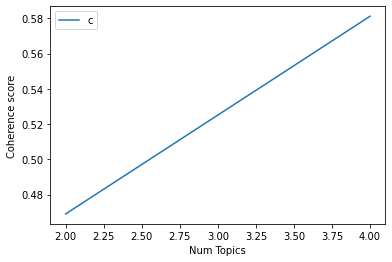

Num Topics = 2  has Coherence Value of 0.469
Num Topics = 4  has Coherence Value of 0.5811


In [345]:
limit=6; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, cats_food_coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()
for m, cv in zip(x, cats_food_coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

In [346]:
with open ('./model/cats_food_model_list.pickle', 'wb') as handle:
    pickle.dump(cats_food_model_list, handle)

# model interpretation

In [76]:
with open ('./model/cats_food_model_list.pickle', 'rb') as handle:
    cats_food_model_list = pickle.load(handle)

In [388]:
# for m in cats_food_model_list: 
#     print(CoherenceModel(model=m, 
#                    texts=df1_dict['cleaned_tokens2'], 
#                    dictionary=cats_food_dictionary, 
#                    coherence='c_v').get_coherence())

In [77]:
cats_food_optimal_model = cats_food_model_list[1] #flavor, ingrent, price, (and ?) #brand, formula etc
model_topics = cats_food_optimal_model.show_topics(formatted=False)
cats_food_optimal_model.print_topics(num_topics=4,num_words=30)

[(0,
  '0.023*"price" + 0.022*"store" + 0.022*"amazon" + 0.018*"order" + 0.009*"local" + 0.008*"pet" + 0.007*"save" + 0.007*"purchase" + 0.006*"cheap" + 0.005*"brand" + 0.005*"smell" + 0.005*"run" + 0.005*"ship" + 0.005*"easy" + 0.005*"shipping" + 0.004*"always" + 0.004*"grocery" + 0.004*"package" + 0.004*"money" + 0.004*"receive" + 0.004*"large" + 0.004*"never" + 0.004*"arrive" + 0.004*"deal" + 0.004*"pay" + 0.004*"carry" + 0.004*"sell" + 0.004*"subscribe" + 0.004*"cost" + 0.004*"size"'),
 (1,
  '0.030*"flavor" + 0.019*"chicken" + 0.015*"variety" + 0.011*"fancy_feast" + 0.010*"gravy" + 0.010*"like" + 0.010*"picky" + 0.009*"tuna" + 0.009*"fish" + 0.009*"smell" + 0.008*"bowl" + 0.008*"brand" + 0.007*"favorite" + 0.007*"finicky" + 0.006*"treat" + 0.006*"salmon" + 0.006*"friskie" + 0.006*"pate" + 0.005*"pack" + 0.005*"prefer" + 0.005*"turkey" + 0.005*"meat" + 0.005*"eater" + 0.005*"beef" + 0.004*"lick" + 0.004*"meal" + 0.004*"chunk" + 0.004*"always" + 0.004*"touch" + 0.004*"piece"'),
 (2,

In [78]:
pyLDAvis.enable_notebook()
topic_data =  pyLDAvis.gensim_models.prepare(cats_food_optimal_model, 
                                             cats_food_doc_term_matrix, 
                                             cats_food_dictionary
                                             #,mds = 'tsne'
                                            )
pyLDAvis.display(topic_data)

C:\Users\JiatingChen\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


In [392]:
#pyLDAvis.save_html(topic_data, 'cat_food_lda.html')

# link topics to sentence level (?????)

In [398]:
#pprint(cats_food_optimal_model.show_topics(formatted=False, num_words=30))

In [81]:
all_topics = {}
num_terms = 15 # Adjust number of words to represent each topic
lambd = 0.6 # Adjust this accordingly based on tuning above
for i in range(1,5): #Adjust this to reflect number of topics chosen for final LDA model
    topic = topic_data.topic_info[topic_data.topic_info.Category == 'Topic'+str(i)].copy()
    topic['relevance'] = topic['loglift']*(1-lambd)+topic['logprob']*lambd
    all_topics['Topic '+str(i)] = topic.sort_values(by='relevance', ascending=False).Term[:num_terms].values
pd.DataFrame(all_topics).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Topic 1,vet,weight,problem,diet,switch,issue,healthy,week,throw,hairball,lose,science,formula,back,recommend
Topic 2,flavor,chicken,variety,fancy_feast,gravy,tuna,picky,like,fish,favorite,bowl,finicky,pate,smell,salmon
Topic 3,store,amazon,price,order,local,save,purchase,ship,shipping,grocery,receive,package,pet,arrive,cheap
Topic 4,ingredient,grain,quality,protein,natural,healthy,pet,list,brand,meat,filler,nutrience,chicken,corn,contain


In [401]:
# documents --------------
# count = 0
# for i in cats_food_optimal_model[cats_food_doc_term_matrix]:
#     print('doc :', count, i)
#     count += 1 

In [69]:
vector = cats_food_optimal_model[cats_food_sen1_doc_term_matrix] #cats_food_sen1_dictionary, cats_food_sen1_doc_term_matrix

In [82]:
# sentences --------------
# count = 0
# for i in cats_food_optimal_model[cats_food_sen1_doc_term_matrix]:
#     print('doc :', count, i)
#     count += 1 

In [85]:
def format_topics_sentences(ldamodel, corpus, texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

In [86]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=cats_food_optimal_model, 
                                                  corpus=cats_food_sen1_doc_term_matrix, 
                                                  texts=final_tokens_sens1)

In [87]:
# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,0.0,0.5899,"price, store, amazon, order, local, pet, save,...","[sale, whim, kitten, omg, nuts, hardwood, spin..."
1,1,2.0,0.7473,"vet, diet, problem, switch, weight, healthy, b...","[kittens, crazy, grow, pay_attention]"
2,2,1.0,0.7211,"flavor, chicken, variety, fancy_feast, gravy, ...","[absolutely, spinner]"
3,3,2.0,0.5007,"vet, diet, problem, switch, weight, healthy, b...","[tiny, lightweight, plastic]"
4,4,0.0,0.8358,"price, store, amazon, order, local, pet, save,...","[toy, thinking, would, spinner, basis, hang, t..."
5,5,2.0,0.8095,"vet, diet, problem, switch, weight, healthy, b...","[lil, kitten, toy]"
6,6,2.0,0.4142,"vet, diet, problem, switch, weight, healthy, b...","[definitely, favorite]"
7,7,2.0,0.5963,"vet, diet, problem, switch, weight, healthy, b...",[blu]
8,8,1.0,0.5949,"flavor, chicken, variety, fancy_feast, gravy, ...",[thing]
9,9,2.0,0.5370,"vet, diet, problem, switch, weight, healthy, b...","[great, toy, playful]"


In [93]:
df_dominant_topic = pd.concat([df_dominant_topic, sents_df1.Sentence1], axis = 1)

In [103]:
df_dominant_topic.head()

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,Sentence1
0,0,0.0,0.5899,"price, store, amazon, order, local, pet, save,...","[sale, whim, kitten, omg, nuts, hardwood, spin...",I found these on sale and bought them on a whi...
1,1,2.0,0.7473,"vet, diet, problem, switch, weight, healthy, b...","[kittens, crazy, grow, pay_attention]","My kittens were crazy over these, but as they ..."
2,2,1.0,0.7211,"flavor, chicken, variety, fancy_feast, gravy, ...","[absolutely, spinner]",My cat absolutely loves spinners!
3,3,2.0,0.5007,"vet, diet, problem, switch, weight, healthy, b...","[tiny, lightweight, plastic]",these were TINY and made out of very lightweig...
4,4,0.0,0.8358,"price, store, amazon, order, local, pet, save,...","[toy, thinking, would, spinner, basis, hang, t...",I bought this cat toy thinking that I would us...


In [101]:
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_dominant_topic.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Topic_Perc_Contrib'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# # Format
# sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# # Show
# sent_topics_sorteddf_mallet.head()

In [104]:
sent_topics_sorteddf_mallet

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,Sentence1
0,27,0.0,0.9452,"price, store, amazon, order, local, pet, save,...","[order, hill, science, early, nugget, large, h...",I ordered Hill's Science for my 2 cats earlier...
1,24847,1.0,0.9190,"flavor, chicken, variety, fancy_feast, gravy, ...","[litter, type, litter, world, litter, clay, li...","I have 3 cats, 3 litter boxes, 3 different typ..."
2,10862,2.0,0.9382,"vet, diet, problem, switch, weight, healthy, b...","[I, m, steer, clear, wheat, move, diet, tight,...",I'm trying to steer clear of wheat in my cats'...
3,22510,3.0,0.9061,"ingredient, grain, quality, healthy, brand, pe...","[I, m, people, not, family, dollar, lb, dollar]",I'm one of those people who can't just go to f...


In [111]:
pd.DataFrame(all_topics).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Topic 1,vet,weight,problem,diet,switch,issue,healthy,week,throw,hairball,lose,science,formula,back,recommend
Topic 2,flavor,chicken,variety,fancy_feast,gravy,tuna,picky,like,fish,favorite,bowl,finicky,pate,smell,salmon
Topic 3,store,amazon,price,order,local,save,purchase,ship,shipping,grocery,receive,package,pet,arrive,cheap
Topic 4,ingredient,grain,quality,protein,natural,healthy,pet,list,brand,meat,filler,nutrience,chicken,corn,contain


In [112]:
sent_topics_sorteddf_mallet.Sentence1[0] #?

"I ordered Hill's Science for my 2 cats earlier but the nuggets were too large & hard for them to eat..I received an e-mail suggesting the Adult Optimal Care."

In [107]:
sent_topics_sorteddf_mallet.Sentence1[1] #?

'I have 3 cats, 3 litter boxes, 3 different types of litter... World\'s Best Kitty Litter, clay litter, and the latest "let\'s try this one!"'

In [108]:
sent_topics_sorteddf_mallet.Sentence1[2] #?

"I'm trying to steer clear of wheat in my cats' food and have moved to an all canned diet for them, but when you're on a tight budget, it's hard.I have three picky eaters."

In [109]:
sent_topics_sorteddf_mallet.Sentence1[3] #?

"I'm one of those people who can't just go to family dollar and buy a 20lb bag of cat food for 5 dollars."

In [117]:
#df_dominant_topic[df_dominant_topic.Document_No == 27] #???

# link features, plus text parsing, link sentences

In [262]:
import gensim.downloader
w2v = gensim.downloader.load('word2vec-google-news-300')

def vectorize_features(features):
    '''
    Embed features to vectors. 

        Parameters:
                features (list): A list of features. 

        Returns:
                arr_dict (dictionary): A dictionary collects {'feature': vector}.
    '''
    arr_dict = {}
    for f in features:
        if isinstance(f, tuple) and len(f) == 2:
            arr = np.mean(np.array([w2v[f[0]], w2v[f[1]]]), axis=0)
            arr_dict[f] = arr
        if isinstance(f, tuple) and len(f) == 3:
            arr = np.mean(np.array([w2v[f[0]], w2v[f[1]], w2v[f[2]]]), axis=0)
            arr_dict[f] = arr
        if isinstance(f, str):
            arr = w2v[f]
            arr_dict[f] = arr

    return arr_dict

def compare_pairwise_features(features, arr_dict):
    '''
    Compute similarity of pairwise features. 

        Parameters:
                features (list): A list of features. 
                arr_dict (dictionary): A dictionary collects {'feature': vector}.

        Returns:
                similarity_dict (dictionary): A dictionary collects {'(pairwise features in a tuple)': similarity score}.
    '''
    pairs =list(itertools.combinations(features, 2))
    similarity_dict = {}
    for p in pairs:
        score = dot(arr_dict[p[0]], arr_dict[p[1]])/(norm(arr_dict[p[0]])*norm(arr_dict[p[1]]))
        similarity_dict[p] = score
    return similarity_dict 

In [263]:
all_topics = {}
num_terms = 15 # Adjust number of words to represent each topic
lambd = 0.6 # Adjust this accordingly based on tuning above
for i in range(1,5): #Adjust this to reflect number of topics chosen for final LDA model
    topic = topic_data.topic_info[topic_data.topic_info.Category == 'Topic'+str(i)].copy()
    topic['relevance'] = topic['loglift']*(1-lambd)+topic['logprob']*lambd
    all_topics['Topic '+str(i)] = topic.sort_values(by='relevance', ascending=False).Term[:num_terms].values
topic_kw_tables = pd.DataFrame(all_topics).T

In [257]:
topic_kw_lst = topic_kw_tables.iloc[0].tolist() + topic_kw_tables.iloc[1].tolist() + topic_kw_tables.iloc[2].tolist() + topic_kw_tables.iloc[3].tolist()

In [264]:
topic_kw_lst = [(w.split("_")[0], w.split("_")[1]) if '_' in w  else w for w in topic_kw_lst]

In [268]:
list(set(topic_kw_lst)) #need to do spelling checking!!!!! 

topic_kw_lst = [#'nutrience', 
 'corn',
 'salmon',
 'receive',
 'ship',
 #'week',
 'quality',
 #'lose',
 'diet',
 #'throw',
 #'favorite',
 'recommend',
 'natural',
 #'filler',
 #'hairball',
 'science',
 #'switch',
 'save',
 'package',
 'finicky',
 'ingredient',
 'tuna',
 'purchase',
 'store',
 'pet',
 'issue',
 'picky',
 'arrive',
 'grain',
 'bowl',
 'smell',
 'cheap',
 'amazon',
 'flavor',
 'shipping',
 'list',
 'brand',
 'weight',
 #'local',
 'formula',
 'gravy',
 'grocery',
 'fish',
 'vet',
 'problem',
 'protein',
 'meat',
 'healthy',
 'price',
 'variety',
 #'back',
 'contain',
 ('fancy', 'feast'),
 'pate',
 'order',
 'chicken',
 'like'
]

In [269]:
#remove royan canin 
updated_topic_kw_lst = [w for w in topic_kw_lst if w != ('royal', 'canin') and w != 'friskie' and w != 'weruva' and w != 'nutrience'] 

In [272]:
# updated_topic_kw_lst.remove('grainfree')
# updated_topic_kw_lst.remove('ago')
# updated_topic_kw_lst.remove('week')
# updated_topic_kw_lst.remove('never')
# updated_topic_kw_lst.remove('back')

In [273]:
updated_topic_kw_lst.append(('grain', 'free'))

In [274]:
updated_topic_kw_lst = list(set(updated_topic_kw_lst))

In [275]:
vec_features = vectorize_features(updated_topic_kw_lst)

In [276]:
dict_features = compare_pairwise_features(updated_topic_kw_lst, vec_features)

In [277]:
{k: v for k, v in sorted(dict_features.items(), key=lambda item: item[1], reverse=True)}

{(('grain', 'free'), 'grain'): 0.8057776,
 ('salmon', 'fish'): 0.7214174,
 ('meat', 'chicken'): 0.6799131,
 ('tuna', 'fish'): 0.6764007,
 ('corn', 'grain'): 0.64608663,
 ('finicky', 'picky'): 0.6255537,
 ('salmon', 'tuna'): 0.61111414,
 ('issue', 'problem'): 0.56454563,
 ('ship', 'shipping'): 0.5503575,
 ('tuna', 'meat'): 0.54405314,
 ('store', 'grocery'): 0.53106177,
 ('corn', ('grain', 'free')): 0.51799196,
 ('diet', 'weight'): 0.5130083,
 ('pet', 'vet'): 0.5076256,
 ('gravy', 'chicken'): 0.4975907,
 ('gravy', 'pate'): 0.47412732,
 ('purchase', 'price'): 0.45742875,
 ('fish', 'meat'): 0.45344695,
 ('tuna', 'chicken'): 0.44780728,
 ('fish', 'chicken'): 0.43314213,
 ('meat', 'grain'): 0.4312572,
 ('gravy', 'meat'): 0.430432,
 ('diet', 'healthy'): 0.42317408,
 ('receive', 'arrive'): 0.41649738,
 ('corn', 'meat'): 0.41606656,
 ('ingredient', 'flavor'): 0.41266268,
 ('corn', 'chicken'): 0.4113093,
 ('salmon', 'meat'): 0.41110757,
 ('pate', 'chicken'): 0.40731916,
 ('diet', 'protein'): 0.3

In [222]:
{k: v for k, v in sorted(dict_features.items(), key=lambda item: item[1], reverse=False)}

{('deliver', 'tiki'): -0.12333482,
 ('allergy', 'money'): -0.11976325,
 ('tiki', 'receive'): -0.1123768,
 ('filler', 'home'): -0.09149749,
 ('pate', 'wellness'): -0.0908548,
 ('byproduct', 'arrive'): -0.087774575,
 ('send', 'natural'): -0.08480486,
 ('lose', 'variety'): -0.08319987,
 ('hairball', 'receive'): -0.08010441,
 ('indoor', 'amazon'): -0.07807102,
 ('send', 'organic'): -0.07779076,
 ('receive', 'amazon'): -0.07236189,
 ('indoor', 'pate'): -0.06970845,
 ('arrive', 'hairball'): -0.06726072,
 ('balance', 'vomit'): -0.06557192,
 ('tiki', 'prime'): -0.06537729,
 ('online', 'pate'): -0.06506585,
 ('tiki', 'quality'): -0.062267914,
 ('delivery', 'tiki'): -0.06221847,
 ('run', 'amazon'): -0.061840508,
 ('online', 'lick'): -0.060588878,
 ('subscribe', 'grain'): -0.060182836,
 ('run', 'pouch'): -0.060180534,
 ('send', 'hairball'): -0.05773749,
 ('arrive', 'label'): -0.057177845,
 ('shipping', 'balance'): -0.056085948,
 ('tiki', 'lose'): -0.05492021,
 ('chicken', 'receive'): -0.054527912

In [278]:
for k, v in dict_features.items():
    if v < 0:
        dict_features[k] = 0

In [279]:
{k: v for k, v in sorted(dict_features.items(), key=lambda item: item[1], reverse=False)}

{('corn', 'receive'): 0,
 ('corn', 'package'): 0,
 ('corn', 'list'): 0,
 ('salmon', 'arrive'): 0,
 ('salmon', 'problem'): 0,
 ('receive', 'natural'): 0,
 ('receive', 'ingredient'): 0,
 ('receive', 'tuna'): 0,
 ('receive', 'amazon'): 0,
 ('receive', 'problem'): 0,
 ('receive', 'meat'): 0,
 ('receive', 'chicken'): 0,
 ('receive', 'grain'): 0,
 ('ship', 'formula'): 0,
 ('ship', 'pate'): 0,
 ('ship', 'chicken'): 0,
 ('diet', 'issue'): 0,
 ('diet', 'arrive'): 0,
 ('natural', 'issue'): 0,
 ('natural', 'arrive'): 0,
 ('save', 'flavor'): 0,
 ('save', 'formula'): 0,
 ('save', 'protein'): 0,
 ('science', 'package'): 0,
 ('science', 'purchase'): 0,
 ('science', 'shipping'): 0,
 ('ingredient', 'arrive'): 0,
 ('tuna', 'problem'): 0,
 ('purchase', 'vet'): 0,
 ('store', 'gravy'): 0,
 ('store', 'pate'): 0,
 ('issue', ('fancy', 'feast')): 0,
 ('picky', 'order'): 0,
 ('arrive', 'brand'): 0,
 ('arrive', 'fish'): 0,
 ('arrive', 'variety'): 0,
 ('arrive', 'chicken'): 0,
 ('bowl', 'amazon'): 0,
 ('smell', '

# clustering graphing using dendrogram

In [280]:
from scipy.spatial.distance import pdist
from scipy.spatial import distance
from scipy.cluster.hierarchy import dendrogram, linkage
z = linkage(np.array(list(dict_features.values())))

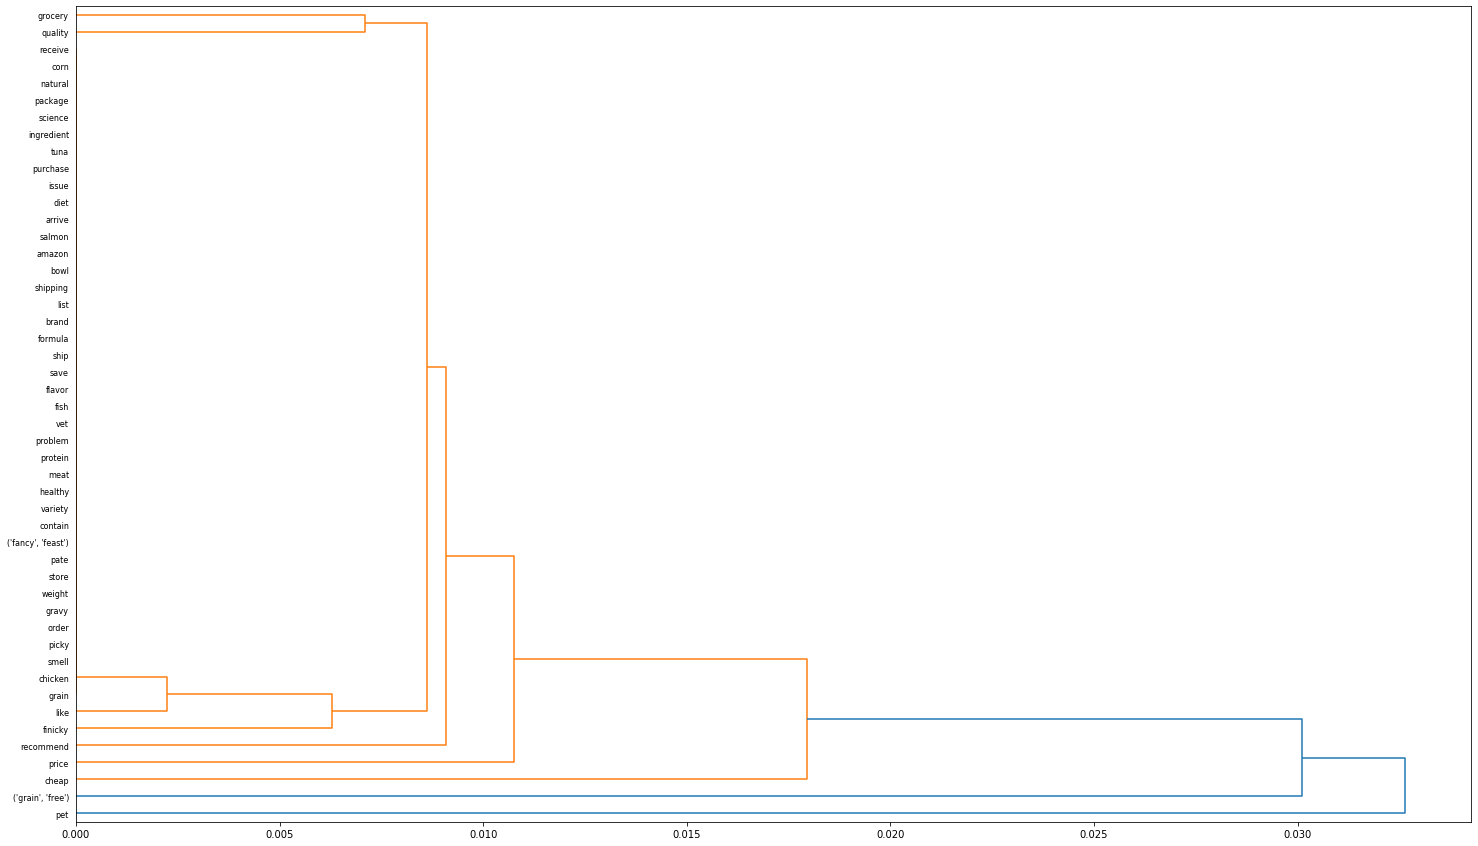

In [281]:
fig = plt.figure(figsize=(25, 15))
dn = dendrogram(z, orientation='right', labels=list(vec_features.keys())) #cosine distance = 1 - consine similarity
plt.show()